# Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import normaltest

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# Funções

In [2]:
def normal_test(list, feature, array, alpha=0.05):
    p = normaltest(array).pvalue
    list.append({
        'feature': feature,
        'p_valor': p
    })
    if p < alpha:
        string = f'Rejeita H0, A feature {feature} NÃO ESTÁ normalmente distribuída'
        resultado = None
    elif p >= alpha:
        string = f'Aceita H0, A feature {feature} ESTÁ normalmente distribuída'
        resultado = 'Normal'
    else:
        string = f'Erro feature {feature}'
        resultado = None
    return string, resultado

# Lendo os Dados

In [3]:
train_label = pd.read_csv('../data/train_labels.csv')
train_label

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1


In [4]:
df = pd.read_csv('../data/train_data.csv')
df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-11-05,0.979332,0.416013,0.020818,0.828199,0.003487,0.090743,0.005340,0.025139,...,NaN,NaN,NaN,0.006838,0.003680,0.000457,NaN,0.000905,0.001498,0.002774
5531447,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-12-23,0.984907,0.296536,0.007209,0.812610,0.005904,0.079886,0.002243,0.023691,...,NaN,NaN,NaN,0.003310,0.007097,0.007857,NaN,0.002777,0.008225,0.008856
5531448,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-01-06,0.983019,0.443984,0.013151,0.815422,0.003457,0.100503,0.002111,0.012343,...,NaN,NaN,NaN,0.009955,0.009994,0.001088,NaN,0.005693,0.006773,0.005566
5531449,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-02-06,0.969861,0.442553,0.009855,1.003541,0.005117,0.101802,0.009930,0.008578,...,NaN,NaN,NaN,0.005541,0.006564,0.009883,NaN,0.008123,0.001168,0.003983


In [5]:
df = df.merge(train_label, how='left', left_on='customer_ID', right_on='customer_ID')
df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-11-05,0.979332,0.416013,0.020818,0.828199,0.003487,0.090743,0.005340,0.025139,...,NaN,NaN,0.006838,0.003680,0.000457,NaN,0.000905,0.001498,0.002774,0
5531447,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-12-23,0.984907,0.296536,0.007209,0.812610,0.005904,0.079886,0.002243,0.023691,...,NaN,NaN,0.003310,0.007097,0.007857,NaN,0.002777,0.008225,0.008856,0
5531448,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-01-06,0.983019,0.443984,0.013151,0.815422,0.003457,0.100503,0.002111,0.012343,...,NaN,NaN,0.009955,0.009994,0.001088,NaN,0.005693,0.006773,0.005566,0
5531449,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-02-06,0.969861,0.442553,0.009855,1.003541,0.005117,0.101802,0.009930,0.008578,...,NaN,NaN,0.005541,0.006564,0.009883,NaN,0.008123,0.001168,0.003983,0


# EDA

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
P_2,5485466.0,0.656334,0.244649,-4.589548e-01,0.480331,0.694295,0.864816,1.010000
D_39,5531451.0,0.153117,0.270071,5.026190e-09,0.004528,0.009057,0.236641,5.389619
B_1,5531451.0,0.124010,0.211987,-7.588799e+00,0.008864,0.031330,0.125902,1.324060
B_2,5529435.0,0.621489,0.401488,9.192280e-09,0.105331,0.814333,1.002403,1.010000
R_1,5531451.0,0.078803,0.226397,1.534223e-09,0.002896,0.005782,0.008661,3.256284
...,...,...,...,...,...,...,...,...
D_142,944408.0,0.390799,0.236182,-1.453934e-02,0.199399,0.382136,0.559308,2.229368
D_143,5429903.0,0.178802,0.378950,5.549692e-09,0.003028,0.006053,0.009076,1.010000
D_144,5490724.0,0.052390,0.182513,2.500991e-09,0.002753,0.005508,0.008260,1.343331
D_145,5429903.0,0.062335,0.193494,1.226024e-09,0.003028,0.006053,0.009081,4.827630


### Valores Nulos

In [7]:
df_null = pd.DataFrame(df.isna().sum()/len(df)*100, columns=['null_perc'])
df_null

,null_perc
customer_ID,0.000000
S_2,0.000000
P_2,0.831337
D_39,0.000000
B_1,0.000000
...,...
D_142,82.926577
D_143,1.835829
D_144,0.736281
D_145,1.835829


In [8]:
df_null = df_null.loc[df_null['null_perc']>0]
df_null

,null_perc
P_2,0.831337
B_2,0.036446
S_3,18.449843
D_41,0.036446
B_3,0.036446
...,...
D_141,1.835829
D_142,82.926577
D_143,1.835829
D_144,0.736281


In [9]:
df_null = df_null.loc[df_null['null_perc']>14]
df_null

,null_perc
S_3,18.449843
D_42,85.694278
D_43,29.981211
D_46,21.905627
D_49,90.137597
D_50,56.809723
D_53,73.842921
S_7,18.449843
D_56,54.071581
S_9,53.035686


In [10]:
useless_columns = df_null.index.tolist()
useless_columns

['S_3',
 'D_42',
 'D_43',
 'D_46',
 'D_49',
 'D_50',
 'D_53',
 'S_7',
 'D_56',
 'S_9',
 'B_17',
 'D_66',
 'D_73',
 'D_76',
 'D_77',
 'R_9',
 'D_82',
 'B_29',
 'D_87',
 'D_88',
 'D_105',
 'D_106',
 'R_26',
 'D_108',
 'D_110',
 'D_111',
 'B_39',
 'S_27',
 'B_42',
 'D_132',
 'D_134',
 'D_135',
 'D_136',
 'D_137',
 'D_138',
 'D_142']

In [11]:
df.drop(useless_columns, axis=1, inplace=True)

In [12]:
df.drop('S_2', axis=1, inplace=True)

In [13]:
df

,customer_ID,P_2,D_39,B_1,B_2,R_1,D_41,B_3,D_44,B_4,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.938469,0.001733,0.008724,1.006838,0.009228,0.008771,0.004709,0.000630,0.080986,...,0.005972,0.004345,0.001535,0.002427,0.003706,0.003818,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.936665,0.005775,0.004923,1.000653,0.006151,0.000798,0.002714,0.002526,0.069419,...,0.004838,0.007495,0.004931,0.003954,0.003167,0.005032,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.954180,0.091505,0.021655,1.009672,0.006815,0.007598,0.009423,0.007605,0.068839,...,0.005497,0.009227,0.009123,0.003269,0.007329,0.000427,0.003429,0.006986,0.002603,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.960384,0.002455,0.013683,1.002700,0.001373,0.000685,0.005531,0.006406,0.055630,...,0.008261,0.007206,0.002409,0.006117,0.004516,0.003200,0.008419,0.006527,0.009600,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.947248,0.002483,0.015193,1.000727,0.007605,0.004653,0.009312,0.007731,0.038862,...,0.004848,0.006312,0.004462,0.003671,0.004946,0.008889,0.001670,0.008126,0.009827,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0.979332,0.416013,0.020818,0.828199,0.003487,0.005340,0.025139,0.002178,0.000029,...,0.004508,0.000776,0.007069,0.006838,0.003680,0.000457,0.000905,0.001498,0.002774,0
5531447,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0.984907,0.296536,0.007209,0.812610,0.005904,0.002243,0.023691,0.005217,0.014354,...,0.003406,0.001741,0.002056,0.003310,0.007097,0.007857,0.002777,0.008225,0.008856,0
5531448,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0.983019,0.443984,0.013151,0.815422,0.003457,0.002111,0.012343,0.002350,0.016425,...,0.002946,0.006060,0.005076,0.009955,0.009994,0.001088,0.005693,0.006773,0.005566,0
5531449,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,0.969861,0.442553,0.009855,1.003541,0.005117,0.009930,0.008578,0.006509,0.004424,...,0.008511,0.003811,0.008682,0.005541,0.006564,0.009883,0.008123,0.001168,0.003983,0


### Target

<AxesSubplot:xlabel='target', ylabel='count'>

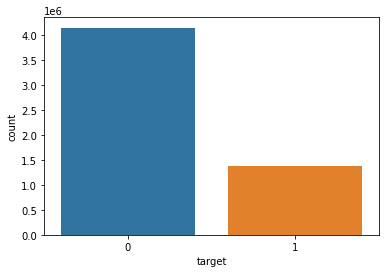

In [14]:
sns.countplot(df['target'])

### Features Categóricas

In [15]:
cat_data = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_68']

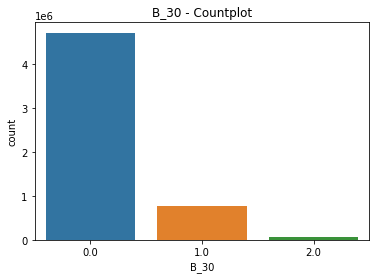

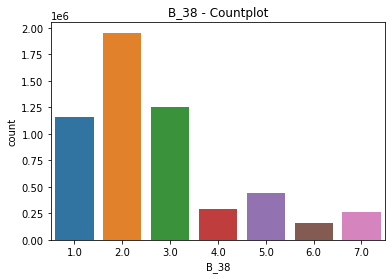

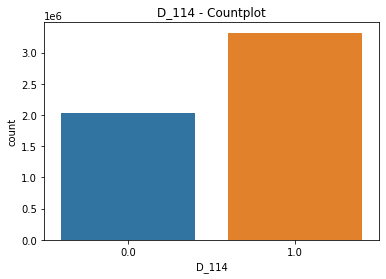

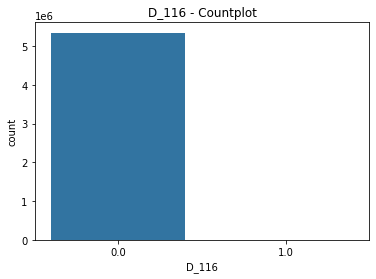

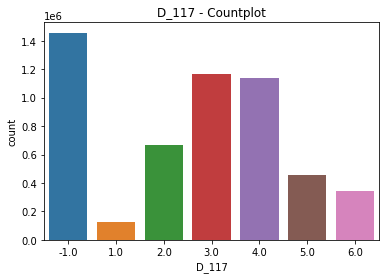

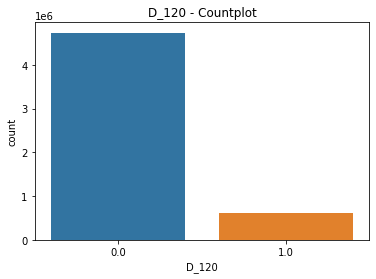

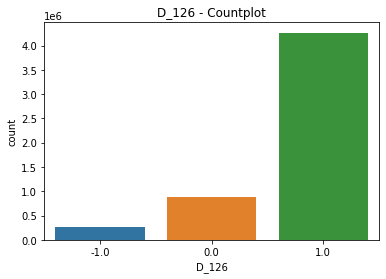

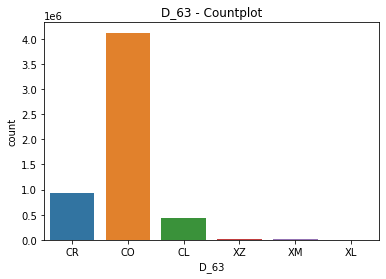

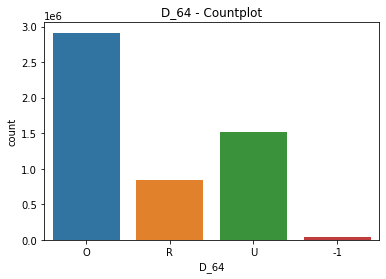

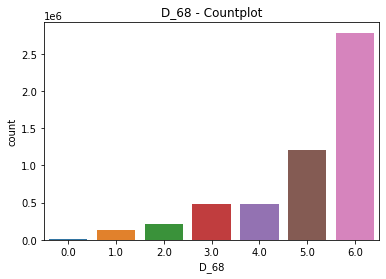

In [16]:
for col in cat_data:
    sns.countplot(df[col])
    plt.title(f'{col} - Countplot')
    plt.show()

### Features Numéricas

##### Teste de Normalidade

In [17]:
p_valor = []

for col in df.drop(['customer_ID', 'target'], axis=1).columns:
    if col not in cat_data:
        array = df[col].values
        string, resultado = normal_test(p_valor, col, array)
        print(string)

Erro feature P_2
Rejeita H0, A feature D_39 NÃO ESTÁ normalmente distribuída
Rejeita H0, A feature B_1 NÃO ESTÁ normalmente distribuída
Erro feature B_2
Rejeita H0, A feature R_1 NÃO ESTÁ normalmente distribuída
Erro feature D_41
Erro feature B_3
Erro feature D_44
Rejeita H0, A feature B_4 NÃO ESTÁ normalmente distribuída
Erro feature D_45
Rejeita H0, A feature B_5 NÃO ESTÁ normalmente distribuída
Rejeita H0, A feature R_2 NÃO ESTÁ normalmente distribuída
Rejeita H0, A feature D_47 NÃO ESTÁ normalmente distribuída
Erro feature D_48
Erro feature B_6
Rejeita H0, A feature B_7 NÃO ESTÁ normalmente distribuída
Erro feature B_8
Rejeita H0, A feature D_51 NÃO ESTÁ normalmente distribuída
Rejeita H0, A feature B_9 NÃO ESTÁ normalmente distribuída
Rejeita H0, A feature R_3 NÃO ESTÁ normalmente distribuída
Erro feature D_52
Erro feature P_3
Rejeita H0, A feature B_10 NÃO ESTÁ normalmente distribuída
Rejeita H0, A feature S_5 NÃO ESTÁ normalmente distribuída
Rejeita H0, A feature B_11 NÃO ESTÁ n

##### Correlação

In [18]:
df_corr = df.drop('customer_ID', axis=1).corr()
df_corr

,P_2,D_39,B_1,B_2,R_1,D_41,B_3,D_44,B_4,D_45,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
P_2,1.000000,-0.191551,-0.368003,0.545083,-0.464548,-0.317395,-0.454154,-0.575777,-0.450588,0.342805,...,-0.213855,-0.140626,-0.016268,-0.184728,-0.138198,-0.180141,-0.184773,0.006733,-0.165209,-0.610765
D_39,-0.191551,1.000000,0.183356,-0.194832,0.194509,0.440503,0.173106,0.135196,0.169298,0.037493,...,0.050498,0.037326,-0.000401,0.032060,0.022463,0.032016,0.032051,0.009343,0.024202,0.180007
B_1,-0.368003,0.183356,1.000000,-0.631075,0.229492,0.185095,0.729890,0.327623,0.497810,-0.107227,...,0.140954,0.107760,0.051541,0.103833,0.054776,0.103099,0.103864,0.036570,0.078757,0.389767
B_2,0.545083,-0.194832,-0.631075,1.000000,-0.303907,-0.257901,-0.713539,-0.449014,-0.510442,0.171038,...,-0.199702,-0.147801,-0.027241,-0.154482,-0.094415,-0.152619,-0.154545,-0.039635,-0.124659,-0.483062
R_1,-0.464548,0.194509,0.229492,-0.303907,1.000000,0.275890,0.272562,0.399099,0.294757,-0.120006,...,0.132822,0.090881,0.040477,0.082094,0.066854,0.080836,0.082147,0.004660,0.073060,0.365000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D_141,-0.180141,0.032016,0.103099,-0.152619,0.080836,0.049332,0.131708,0.125197,0.090761,-0.154890,...,0.104005,0.070363,0.004820,0.998168,0.324814,1.000000,0.997691,0.595004,0.632198,0.124566
D_143,-0.184773,0.032051,0.103864,-0.154545,0.082147,0.049851,0.132831,0.126616,0.090890,-0.158233,...,0.104440,0.070429,0.004932,0.999498,0.325544,0.997691,1.000000,0.568105,0.645761,0.127644
D_144,0.006733,0.009343,0.036570,-0.039635,0.004660,0.010392,0.041107,0.020574,0.036268,-0.038717,...,0.037013,0.031941,-0.000586,0.569267,-0.038592,0.595004,0.568105,1.000000,0.214547,-0.004526
D_145,-0.165209,0.024202,0.078757,-0.124659,0.073060,0.042079,0.107736,0.109918,0.064892,-0.135407,...,0.071972,0.046317,0.003192,0.645738,0.214737,0.632198,0.645761,0.214547,1.000000,0.116221


In [19]:
df_corr_features = df_corr.drop('target', axis=1)
df_corr_features.drop('target', axis=0, inplace=True)
df_corr_features

,P_2,D_39,B_1,B_2,R_1,D_41,B_3,D_44,B_4,D_45,...,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145
P_2,1.000000,-0.191551,-0.368003,0.545083,-0.464548,-0.317395,-0.454154,-0.575777,-0.450588,0.342805,...,-0.213657,-0.213855,-0.140626,-0.016268,-0.184728,-0.138198,-0.180141,-0.184773,0.006733,-0.165209
D_39,-0.191551,1.000000,0.183356,-0.194832,0.194509,0.440503,0.173106,0.135196,0.169298,0.037493,...,0.046036,0.050498,0.037326,-0.000401,0.032060,0.022463,0.032016,0.032051,0.009343,0.024202
B_1,-0.368003,0.183356,1.000000,-0.631075,0.229492,0.185095,0.729890,0.327623,0.497810,-0.107227,...,0.140859,0.140954,0.107760,0.051541,0.103833,0.054776,0.103099,0.103864,0.036570,0.078757
B_2,0.545083,-0.194832,-0.631075,1.000000,-0.303907,-0.257901,-0.713539,-0.449014,-0.510442,0.171038,...,-0.201631,-0.199702,-0.147801,-0.027241,-0.154482,-0.094415,-0.152619,-0.154545,-0.039635,-0.124659
R_1,-0.464548,0.194509,0.229492,-0.303907,1.000000,0.275890,0.272562,0.399099,0.294757,-0.120006,...,0.124346,0.132822,0.090881,0.040477,0.082094,0.066854,0.080836,0.082147,0.004660,0.073060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D_140,-0.138198,0.022463,0.054776,-0.094415,0.066854,0.035893,0.077797,0.095140,0.050471,-0.085296,...,0.049537,0.055429,0.034181,0.003047,0.325933,1.000000,0.324814,0.325544,-0.038592,0.214737
D_141,-0.180141,0.032016,0.103099,-0.152619,0.080836,0.049332,0.131708,0.125197,0.090761,-0.154890,...,0.105626,0.104005,0.070363,0.004820,0.998168,0.324814,1.000000,0.997691,0.595004,0.632198
D_143,-0.184773,0.032051,0.103864,-0.154545,0.082147,0.049851,0.132831,0.126616,0.090890,-0.158233,...,0.105704,0.104440,0.070429,0.004932,0.999498,0.325544,0.997691,1.000000,0.568105,0.645761
D_144,0.006733,0.009343,0.036570,-0.039635,0.004660,0.010392,0.041107,0.020574,0.036268,-0.038717,...,0.042128,0.037013,0.031941,-0.000586,0.569267,-0.038592,0.595004,0.568105,1.000000,0.214547


In [20]:
features_corr_array = df_corr_features.values.flatten()
features_corr_array

array([ 1.        , -0.19155141, -0.36800349, ...,  0.64576058,
        0.21454652,  1.        ])

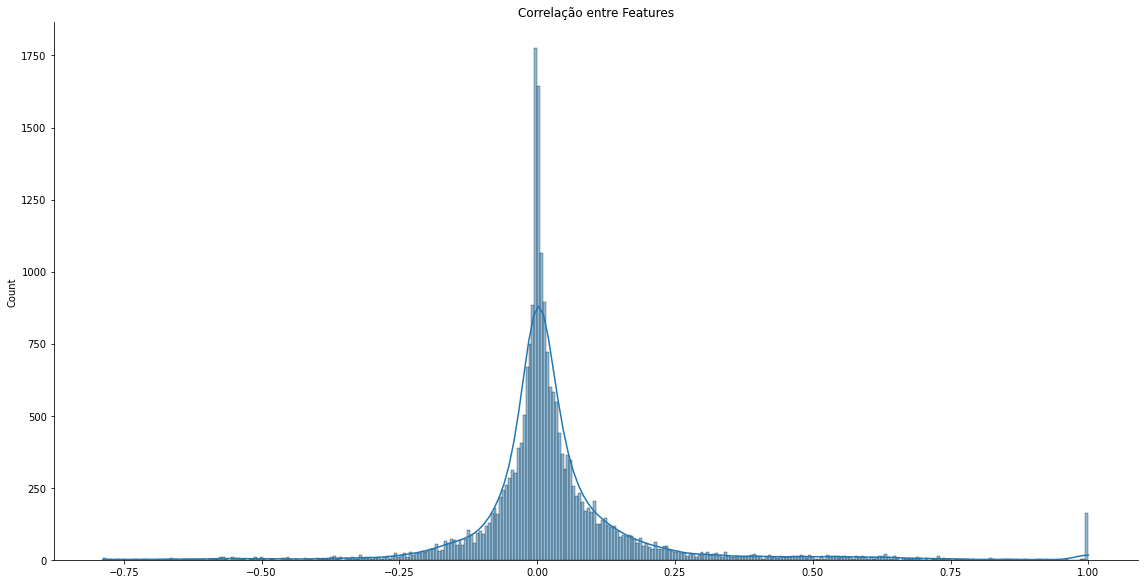

In [21]:
sns.displot(data=features_corr_array, kde=True, height=8, aspect=2)
plt.title('Correlação entre Features')
plt.show()

In [22]:
df_corr_target = df_corr[['target']]
df_corr_target.drop('target', axis=0, inplace=True)
df_corr_target

,target
P_2,-0.610765
D_39,0.180007
B_1,0.389767
B_2,-0.483062
R_1,0.365000
...,...
D_140,0.117074
D_141,0.124566
D_143,0.127644
D_144,-0.004526


In [23]:
target_corr_array = df_corr_target.values.flatten()
target_corr_array

array([-0.61076475,  0.1800069 ,  0.38976669, -0.48306176,  0.36500006,
        0.24677962,  0.42969506,  0.47041115,  0.40358645, -0.27054457,
       -0.06526435,  0.26374071, -0.28004648,  0.54936239, -0.03985862,
        0.43091766,  0.32390033, -0.24915297,  0.47585844,  0.28678727,
       -0.22585983, -0.24374334, -0.01820365,  0.04475911,  0.36893769,
       -0.09894899, -0.13784115,  0.22109143, -0.02777657, -0.15409868,
        0.45667108, -0.02944331,  0.16727632,  0.44864203,  0.08375372,
        0.1949077 , -0.07648881,  0.32211902,  0.00737097, -0.08538999,
       -0.35222984,  0.06962331,  0.39661964, -0.48739332,  0.38849873,
        0.38282442, -0.1753954 ,  0.00750055,  0.1081923 , -0.10613568,
        0.08927443,  0.00450395,  0.36980556,  0.30535043, -0.08037413,
        0.18236705,  0.19311637,  0.42317548,  0.23751121,  0.42140749,
        0.45755705,  0.10903116,  0.06349293,  0.18585842,  0.01985333,
        0.26967493,  0.22298647,  0.15407512,  0.06883852,  0.05

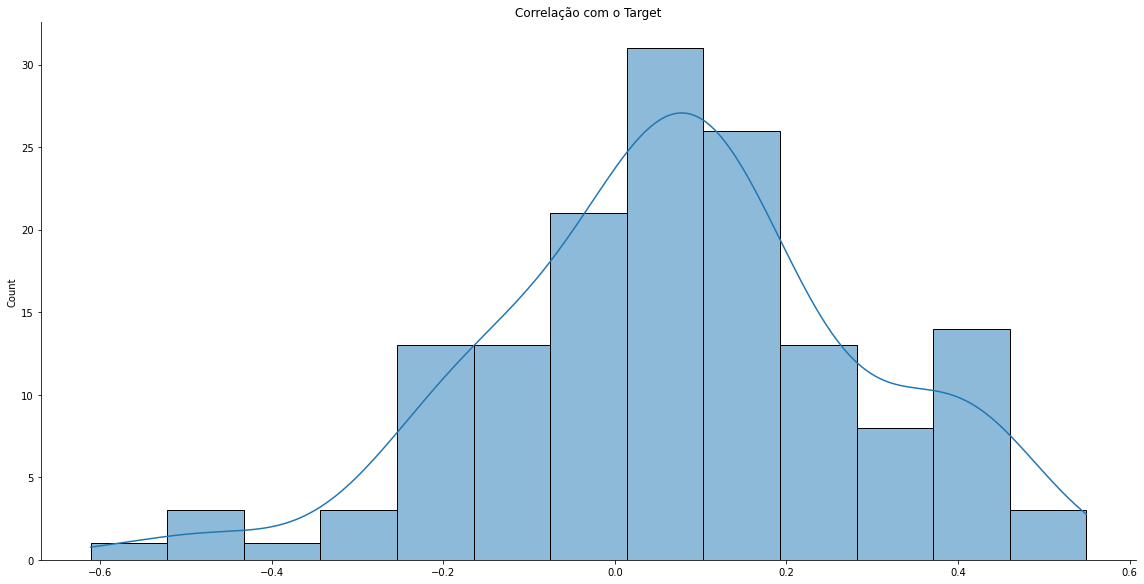

In [24]:
sns.displot(data=target_corr_array, kde=True, height=8, aspect=2)
plt.title('Correlação com o Target')
plt.show()

##### ECDF

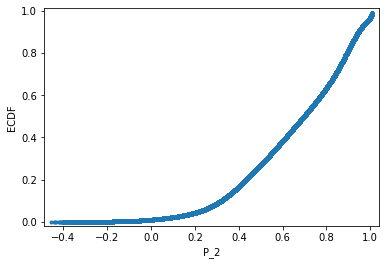

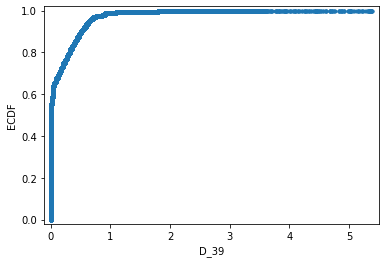

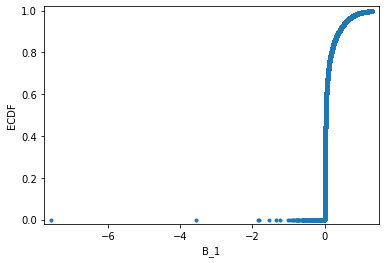

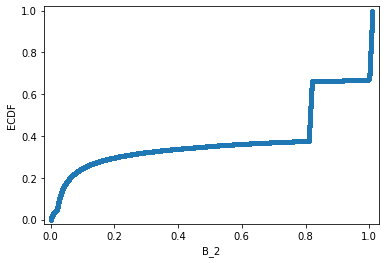

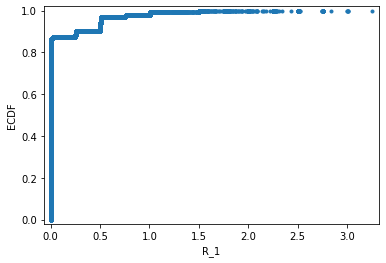

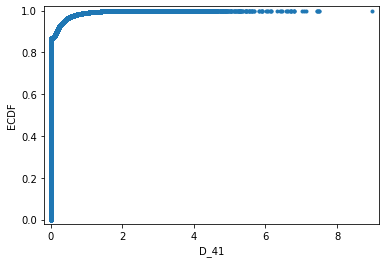

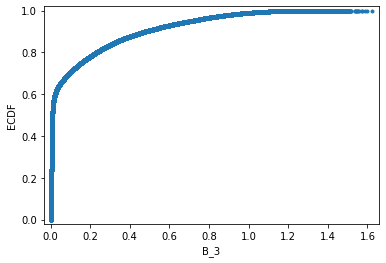

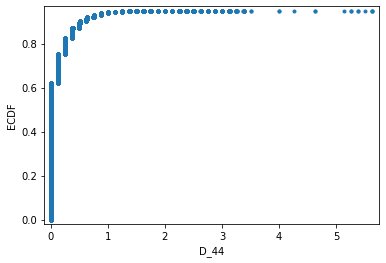

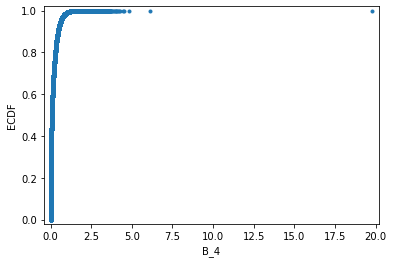

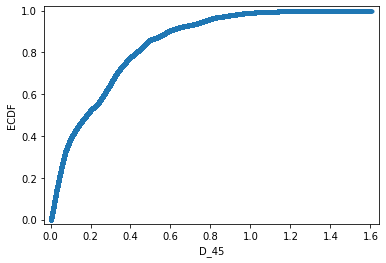

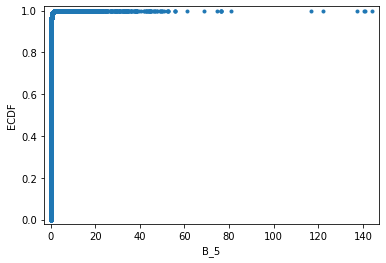

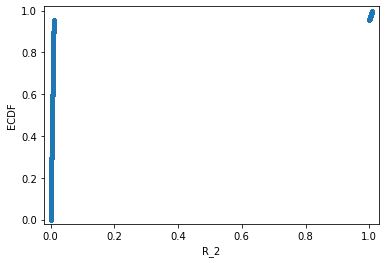

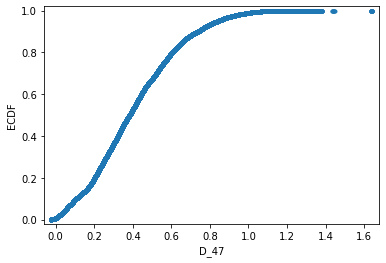

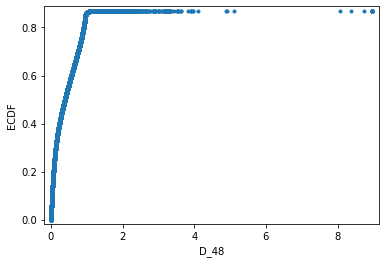

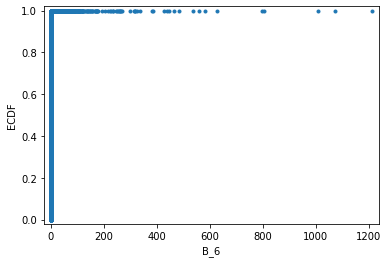

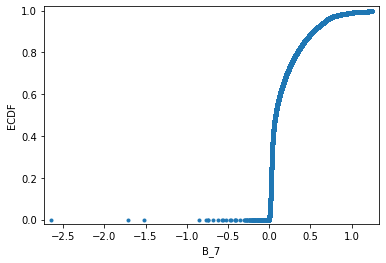

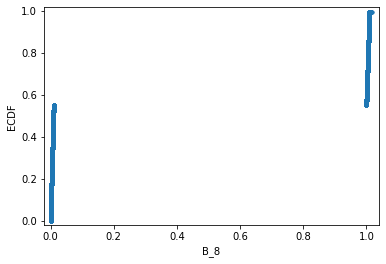

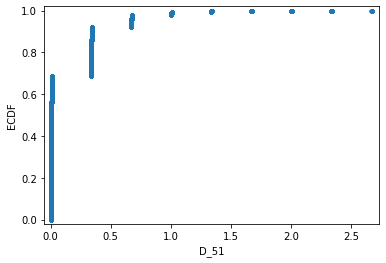

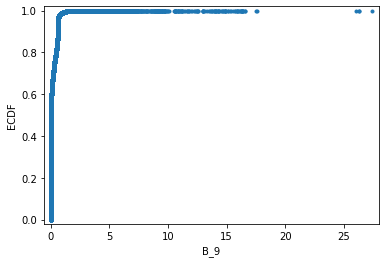

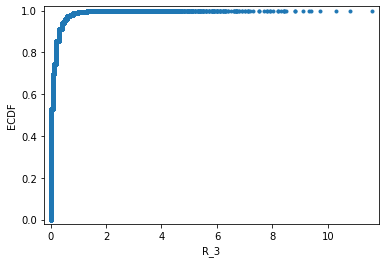

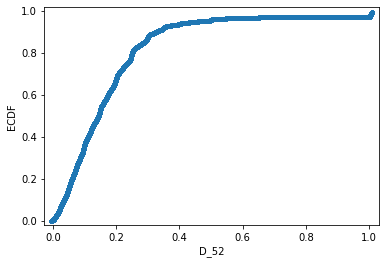

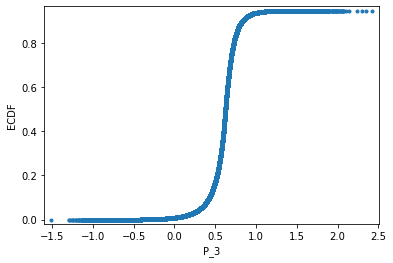

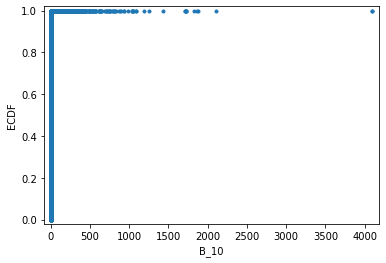

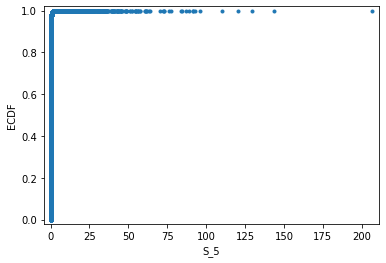

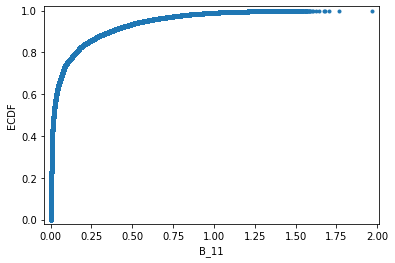

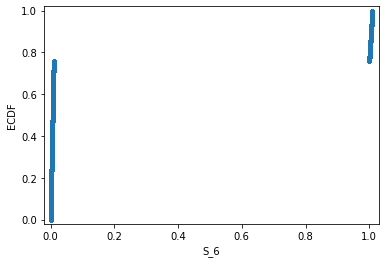

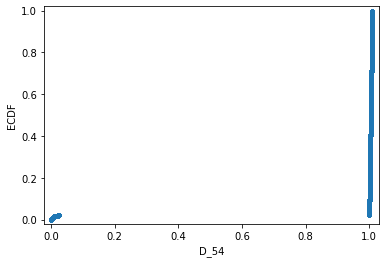

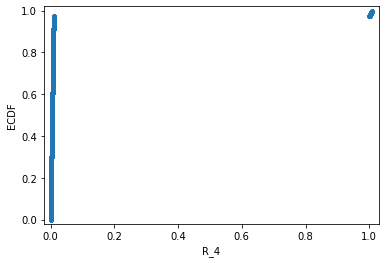

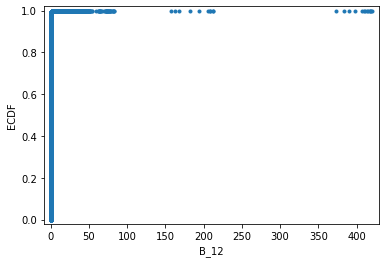

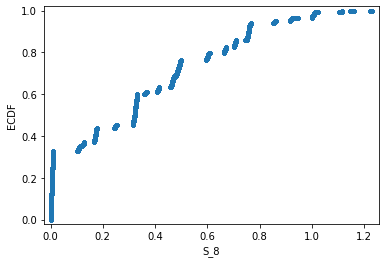

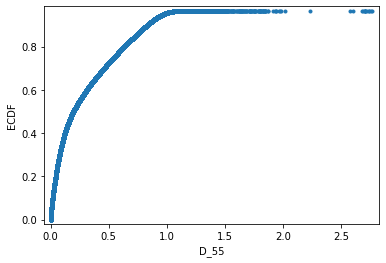

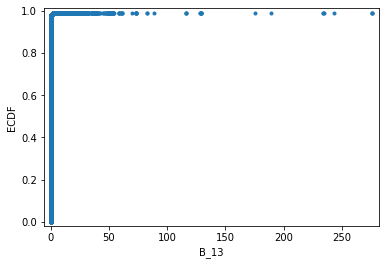

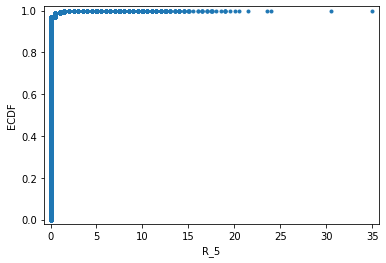

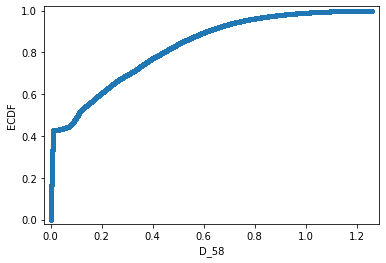

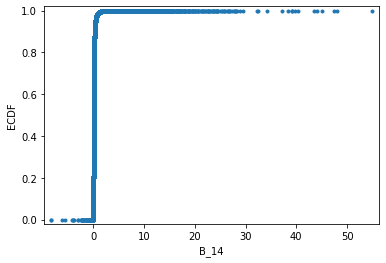

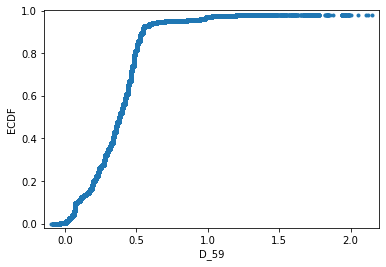

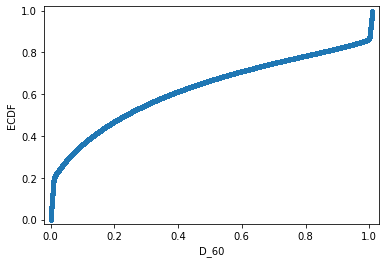

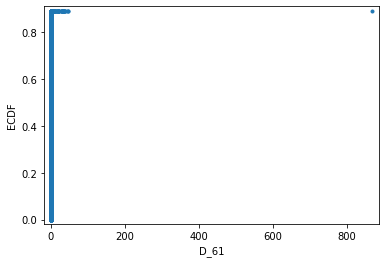

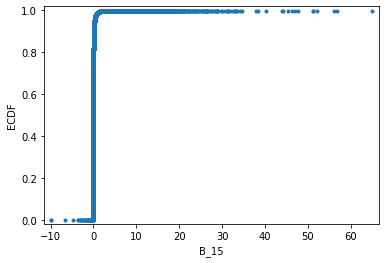

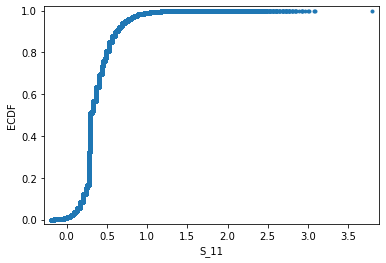

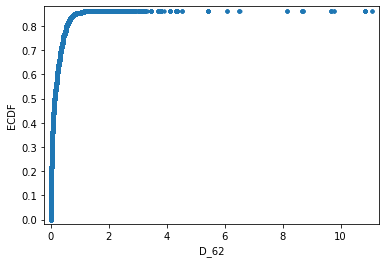

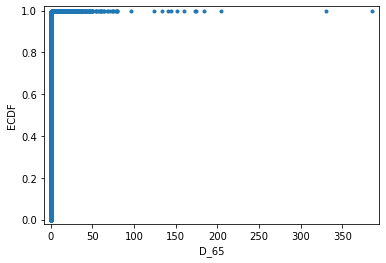

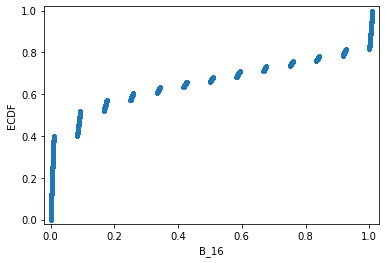

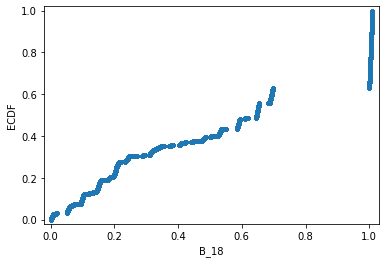

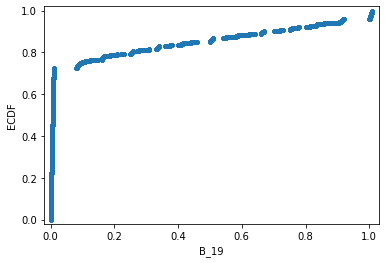

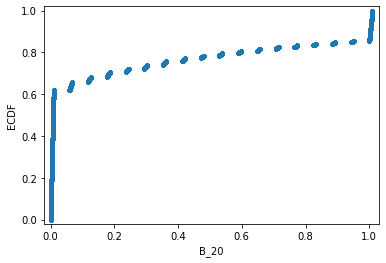

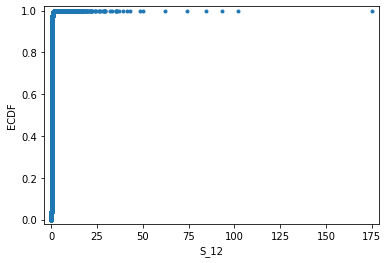

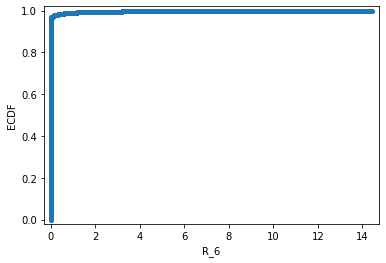

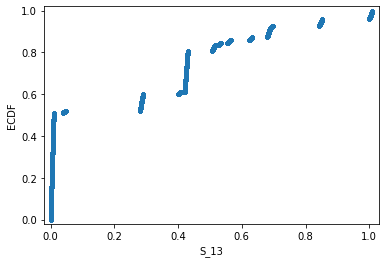

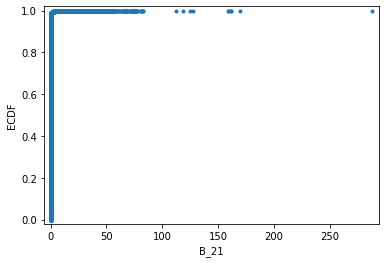

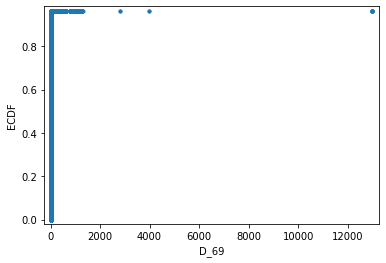

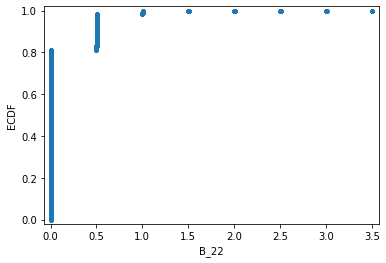

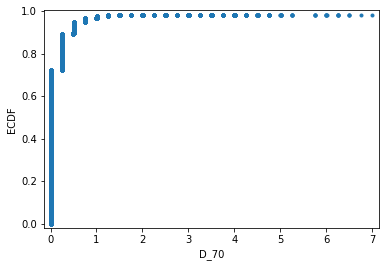

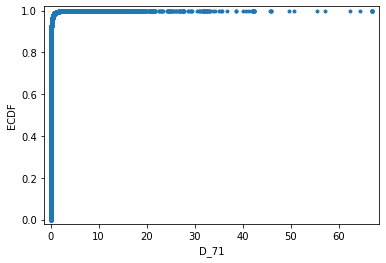

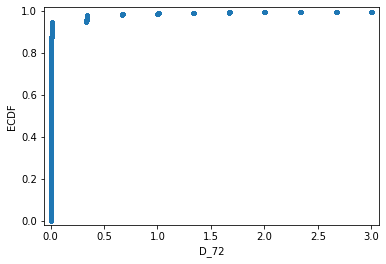

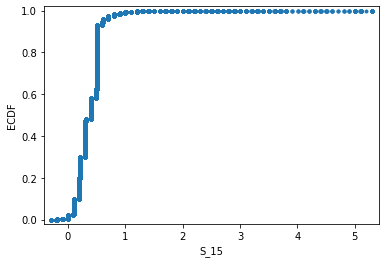

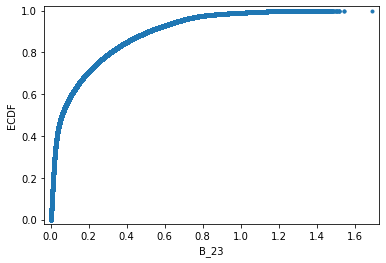

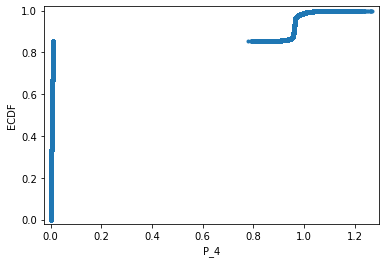

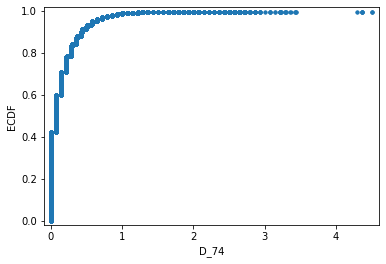

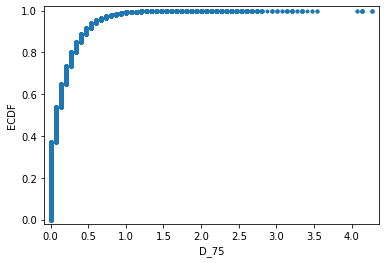

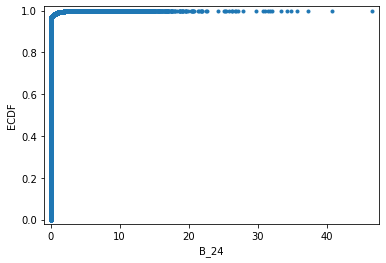

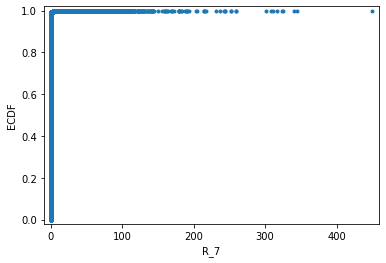

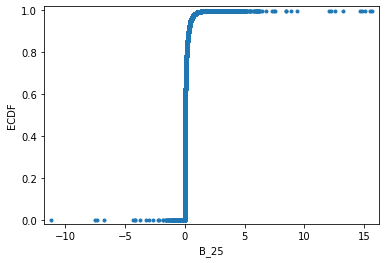

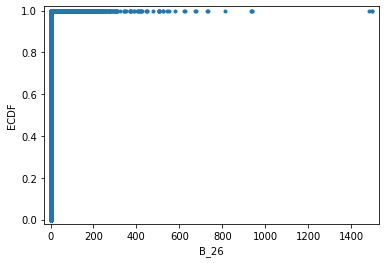

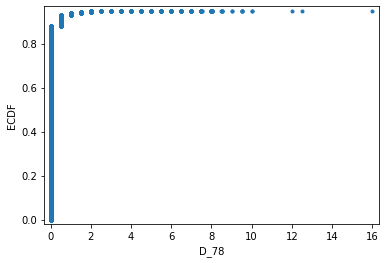

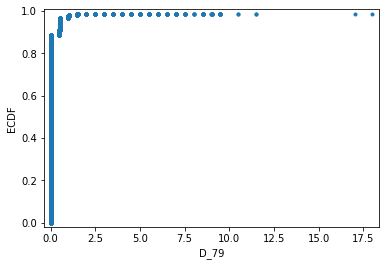

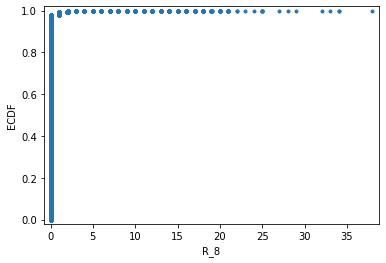

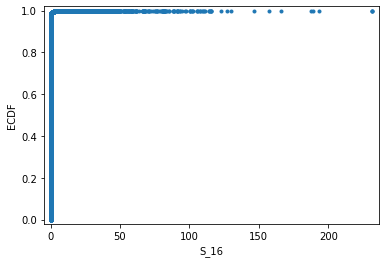

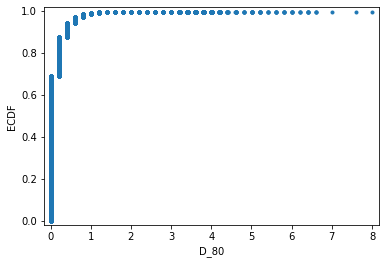

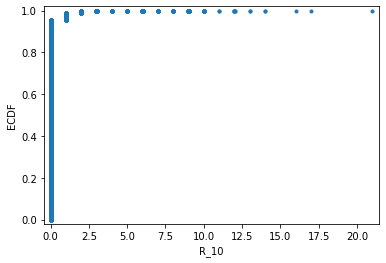

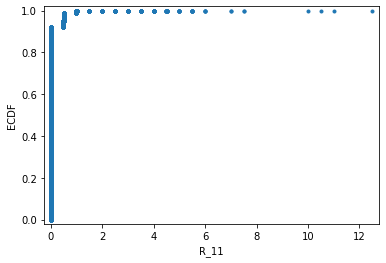

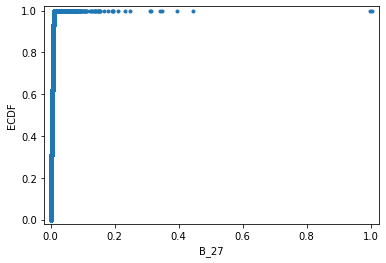

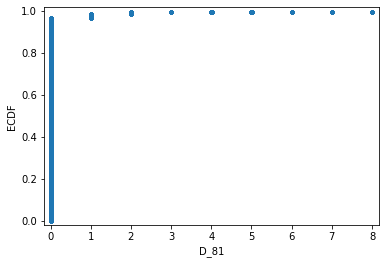

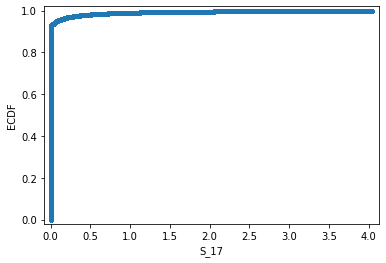

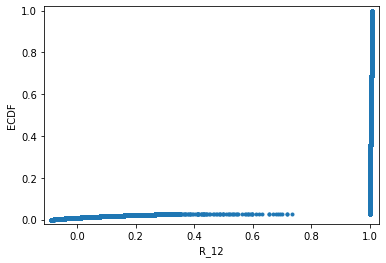

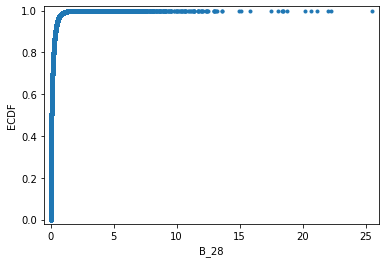

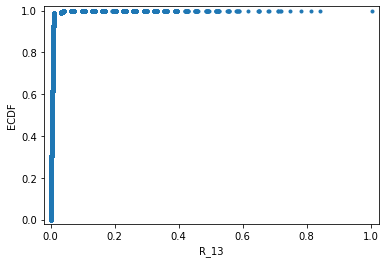

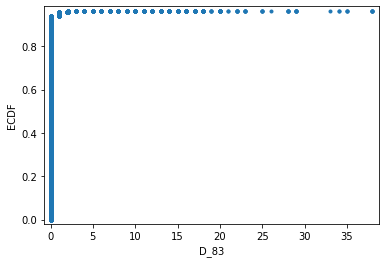

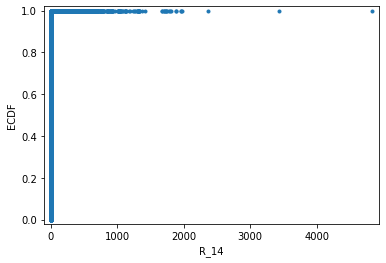

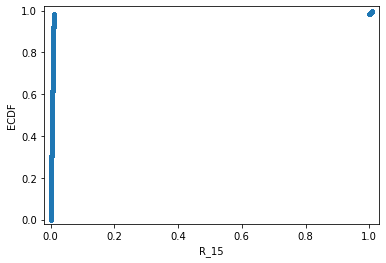

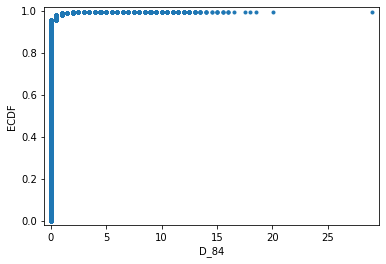

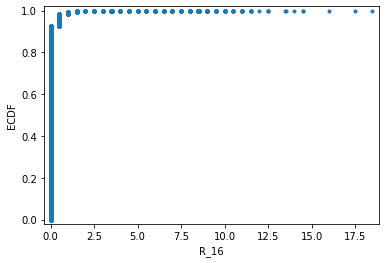

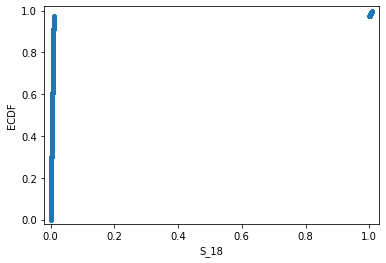

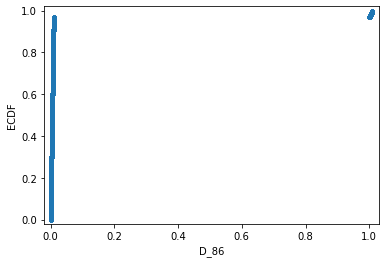

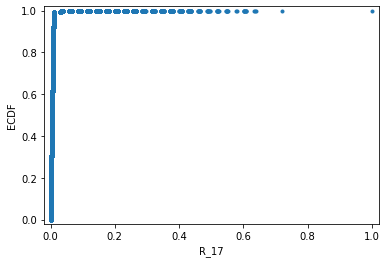

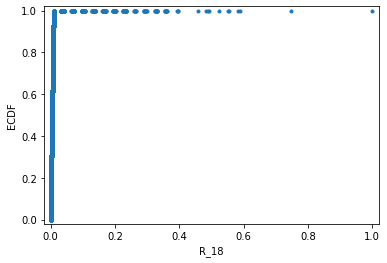

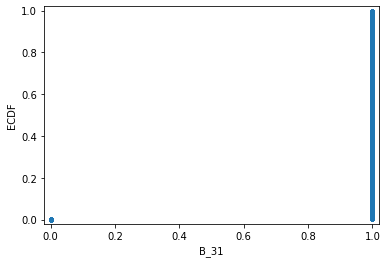

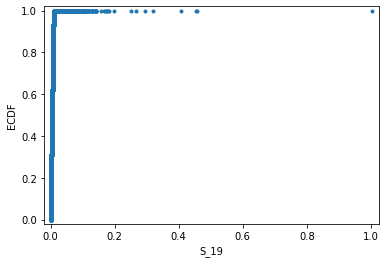

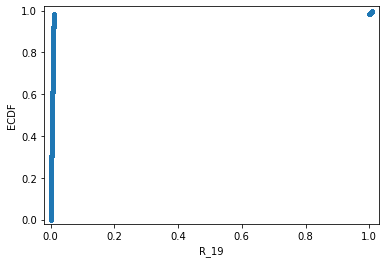

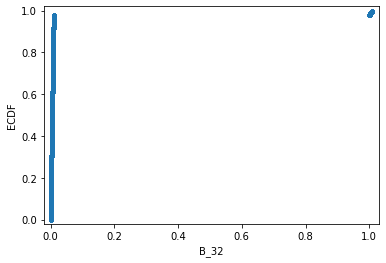

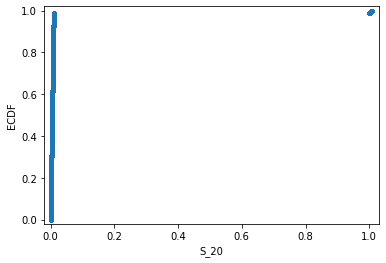

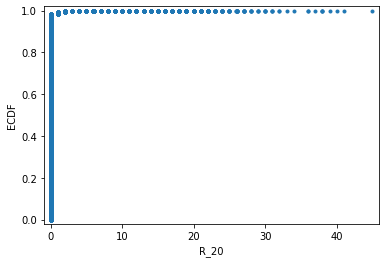

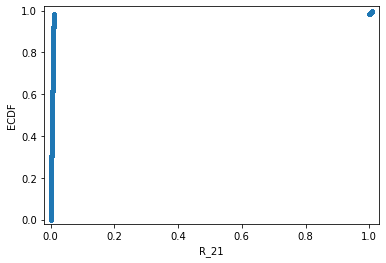

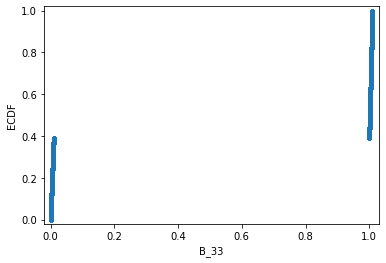

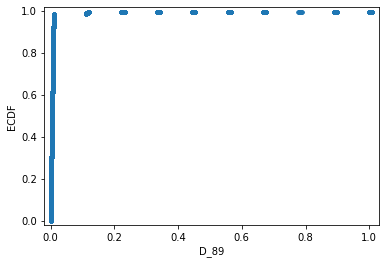

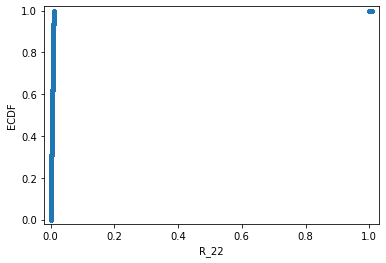

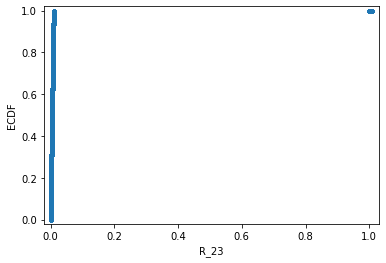

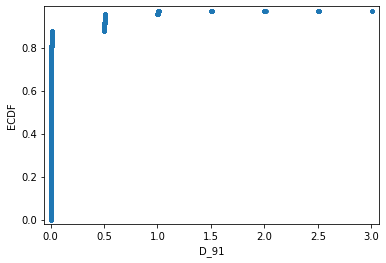

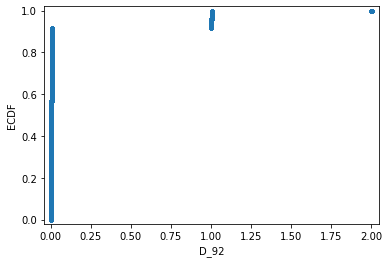

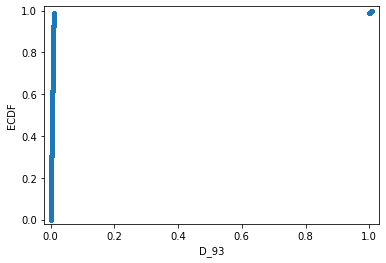

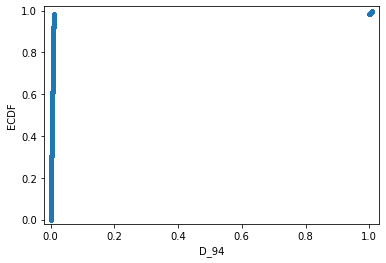

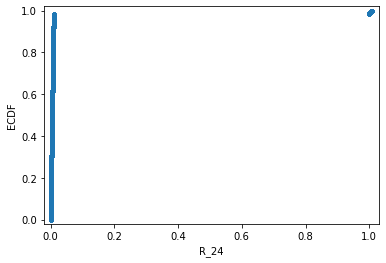

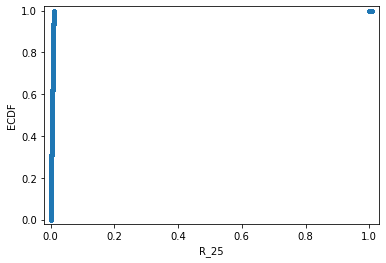

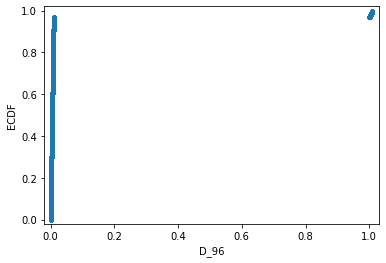

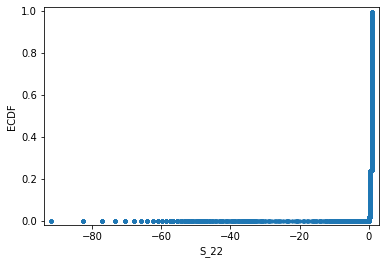

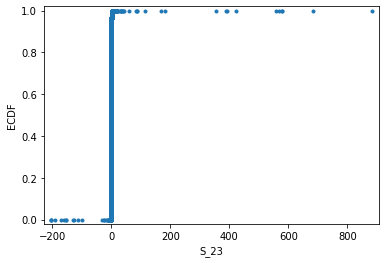

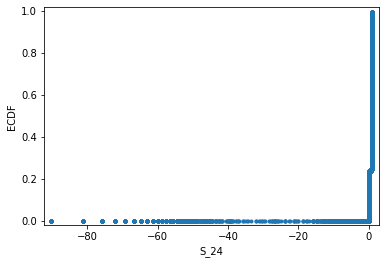

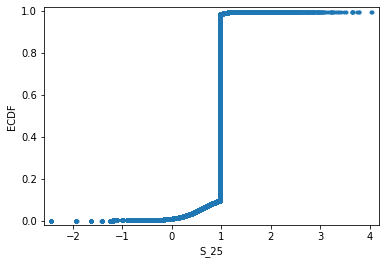

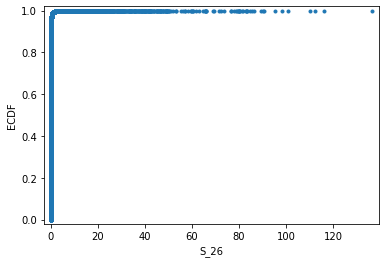

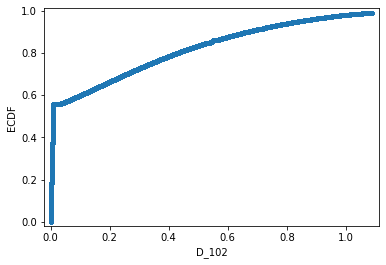

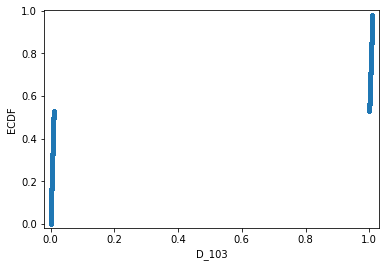

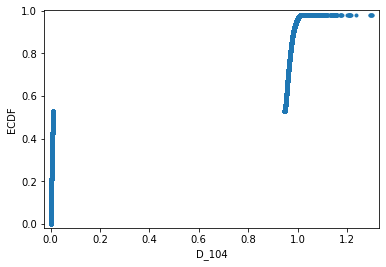

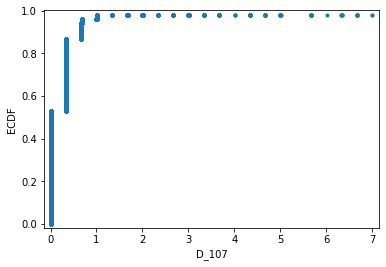

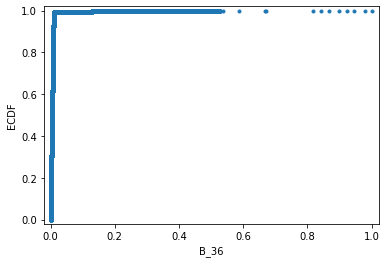

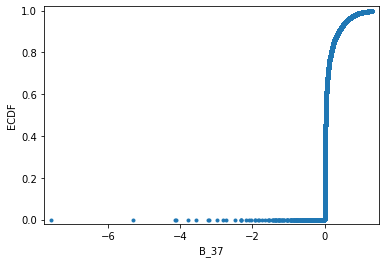

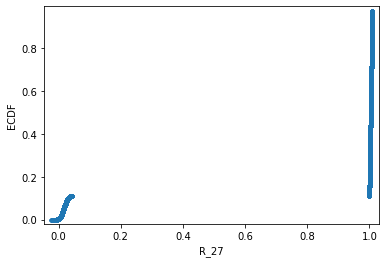

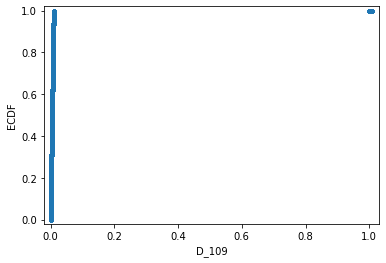

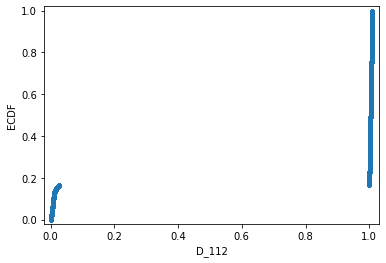

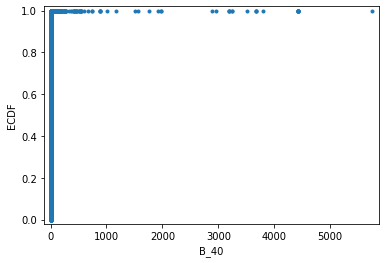

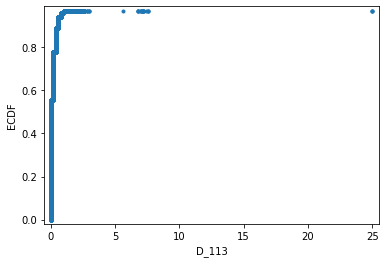

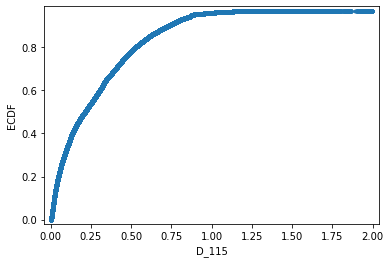

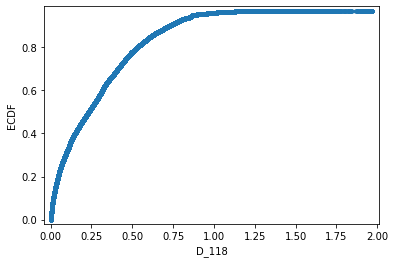

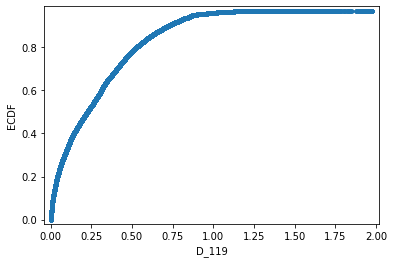

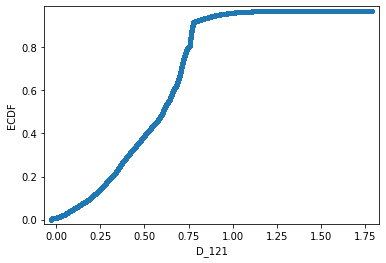

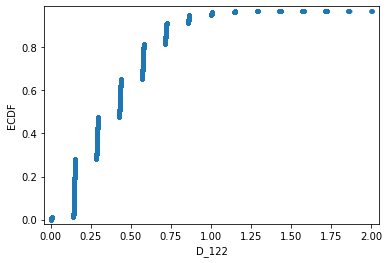

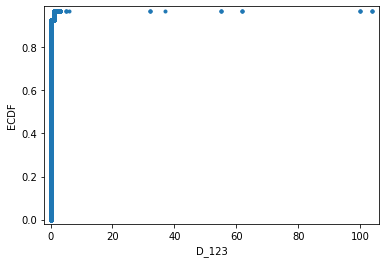

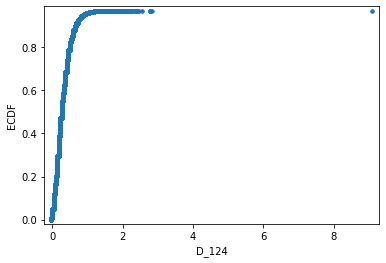

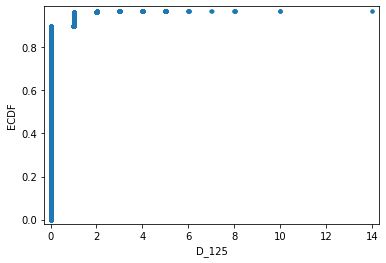

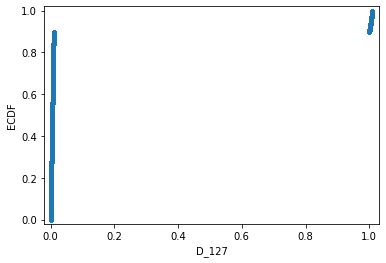

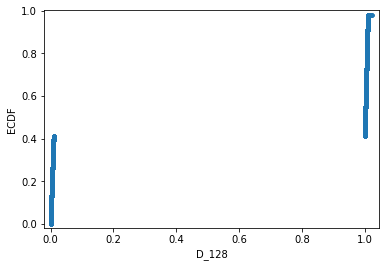

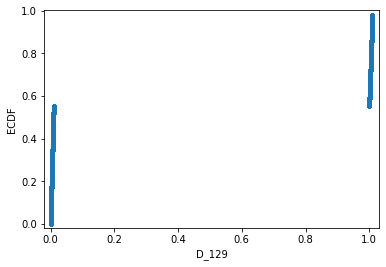

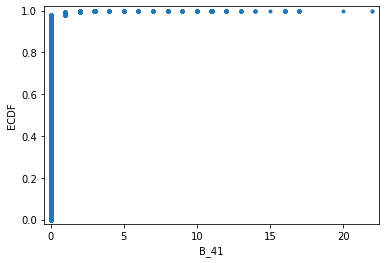

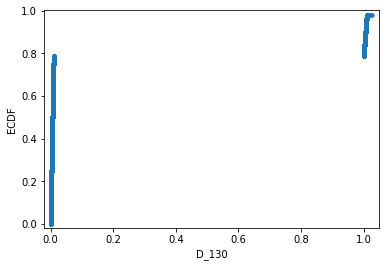

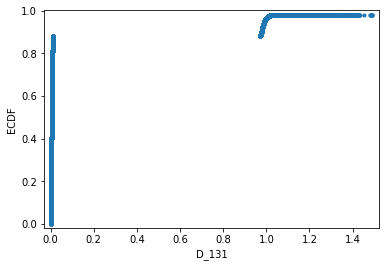

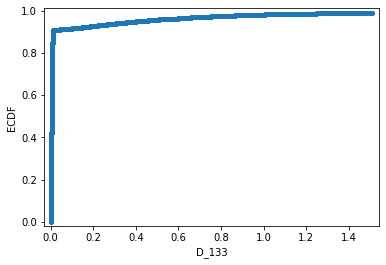

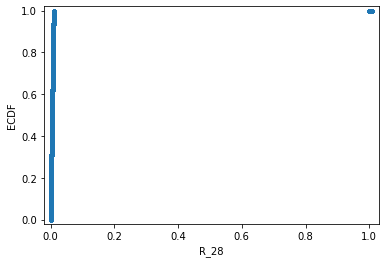

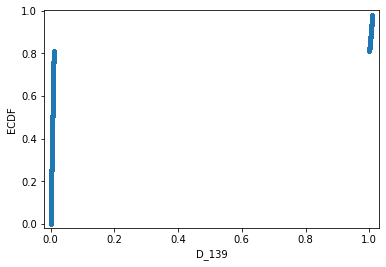

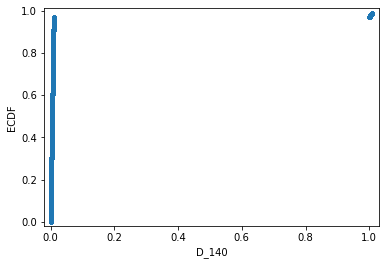

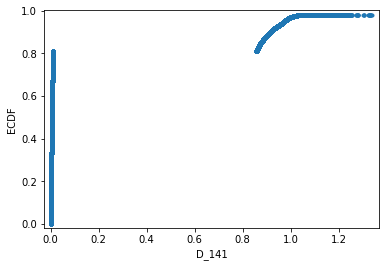

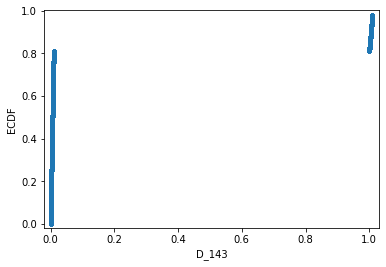

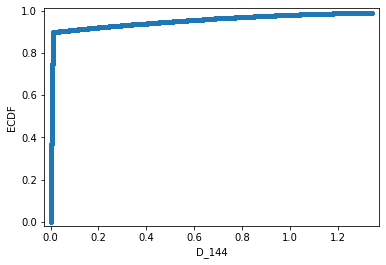

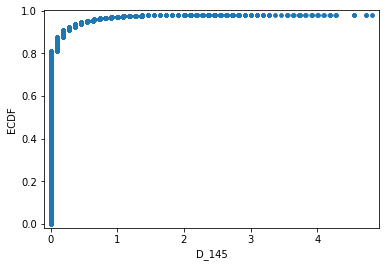

In [25]:
for col in df.drop(['customer_ID', 'target'], axis=1).columns:
    if col not in cat_data:
        x = np.sort(df[col])
        y = np.arange(1, len(x)+1) / len(x)
        plt.plot(x, y, marker='.', linestyle='none')
        plt.xlabel(f'{col}')
        plt.ylabel('ECDF')
        plt.margins(0.02)
        plt.show()

# PCA

In [26]:
pca = PCA(n_components=0.9999)

In [27]:
X = df.drop(['customer_ID', 'target'], axis=1)

In [28]:
pca_features = pca.fit_transform(X)

: 

: 

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), '*-')
plt.title('PCA - Variância Explicada')
plt.xlabel('Número de Features')
plt.ylabel('Explicação')
plt.show()